## 각 알고리즘의 정답률 비교하기

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
from sklearn.utils.testing import all_estimators

In [33]:
iris_data = pd.read_csv('iris.csv', encoding='utf-8')
# 데이터를 레이블,입력 데이터로 분리
y = iris_data.loc[:,'Name']
x = iris_data.loc[:,['SepalLength','SepalWidth','PetalLength','PetalWidth']]

In [34]:
# 학습 데이터,입력 데이터로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
# classifier 알고리즘 모두 추출
warnings.filterwarnings('ignore')
allAlgorithms = all_estimators(type_filter='classifier')

In [35]:
for(name, algorithm) in allAlgorithms:
    clf = algorithm()
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(name,"의 정답률 = ", accuracy_score(y_test, y_pred))

AdaBoostClassifier 의 정답률 =  0.9333333333333333
BaggingClassifier 의 정답률 =  0.9333333333333333
BernoulliNB 의 정답률 =  0.3
CalibratedClassifierCV 의 정답률 =  0.8333333333333334
CategoricalNB 의 정답률 =  0.9


ValueError: could not convert string to float: 'Iris-versicolor'

## 크로스 밸리데이션

In [40]:
import pandas as pd
from sklearn.utils.testing import all_estimators
from sklearn.model_selection import KFold
import warnings
from sklearn.model_selection import cross_val_score

In [41]:
iris_data = pd.read_csv('iris.csv', encoding='utf-8')
# 데이터를 레이블,입력 데이터로 분리
y = iris_data.loc[:,'Name']
x = iris_data.loc[:,['SepalLength','SepalWidth','PetalLength','PetalWidth']]

In [42]:
# classifier 알고리즘 모두 추출
warnings.filterwarnings('ignore')
allAlgorithms = all_estimators(type_filter='classifier')

In [43]:
kfold_cv = KFold(n_splits=5, shuffle=True)

for(name, algorithm) in allAlgorithms:
    clf = algorithm()
    
    if hasattr(clf,"score"):
        scores = cross_val_score(clf, x, y, cv=kfold_cv)
        print(name,"의 정답률 =")
        print(scores)

AdaBoostClassifier 의 정답률 =
[0.93333333 0.86666667 0.93333333 1.         0.93333333]
BaggingClassifier 의 정답률 =
[0.93333333 1.         0.9        1.         0.93333333]
BernoulliNB 의 정답률 =
[0.3        0.26666667 0.3        0.23333333 0.26666667]
CalibratedClassifierCV 의 정답률 =
[0.9        0.8        0.93333333 0.96666667 0.96666667]
CategoricalNB 의 정답률 =
[0.93333333 0.93333333 0.9        0.9        0.96666667]
CheckingClassifier 의 정답률 =
[nan nan nan nan nan]


TypeError: __init__() missing 1 required positional argument: 'base_estimator'

## 그리드 서치

In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

iris_data = pd.read_csv('iris.csv', encoding='utf-8')

y = iris_data.loc[:,'Name']
x = iris_data.loc[:,['SepalLength','SepalWidth','PetalLength','PetalWidth']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, train_size=0.8, shuffle=True)

parameters = [
    {"C": [1, 10, 100, 1000], "kernel":["linear"]},
    {"C": [1, 10, 100, 1000], "kernel":["rbf"], "gamma":[0.001, 0.0001]},
    {"C": [1, 10, 100, 1000], "kernel":["sigmoid"], "gamma":[0.001, 0.0001]}
]

kfold_cv = KFold(n_splits=5, shuffle=True)
clf = GridSearchCV(SVC(), parameters, cv=kfold_cv)
clf.fit(x_train, y_train)
print("최적의 매개 변수 =", clf.best_estimator_)

y_pred = clf.predict(x_test)
print("최종 정답률 =", accuracy_score(y_test, y_pred))

최적의 매개 변수 = SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
최종 정답률 = 1.0


## 이미지 읽어 들이기

In [1]:
# 이미지 다운로드
import urllib.request as req
url = "http://uta.pw/shodou/img/28/214.png"
req.urlretrieve(url, "test.png")

('test.png', <http.client.HTTPMessage at 0x106914650>)

In [2]:
# 이미지 OpenCV 로 읽어 들이기
import cv2

img = cv2.imread("test.png")
print(img)

ModuleNotFoundError: No module named 'cv2'

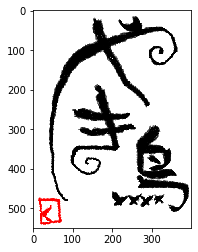

In [7]:
# 다운로드한 이미지 출력하기
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

img = cv2.imread("test.png")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

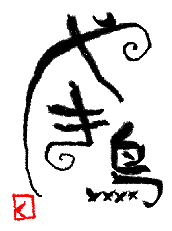

In [8]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

img = cv2.imread("test.png")
plt.axis("off") # axis 출력 끄기
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [9]:
# 이미지 읽어 들이고 저장하기
import cv2

img = cv2.imread("test.png")

cv2.imwrite("out.png", img)
## OpenCV 는 bmp/ppm/pgm/pbm/jpeg/jpeg2000/png/tiff/OpenEXR/Webs 등의 대표적인 이미지 형식을 모두 지원합니다.

True

## 이미지 크기 변경

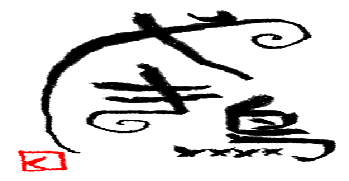

In [18]:
import matplotlib.pyplot as plt
import cv2

img = cv2.imread("test.png")

img2 = cv2.resize(img, (600,300))  # 이미지 크기 변경
## 크기 변경은 1번 매개변수는 읽어 들인 이미지, 2번 매개변수는 변경할 크기를 튜플로 지정
## ex) img = cv2.resize(img, (width, height))
cv2.imwrite("out-resize.png", img2)  # 변경한 이미지 저장

plt.axis("off")
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.show()

#### OpenCV 의 좌표계 : (0,0) 오른쪽-> (x,0) / (0,0) 아랫쪽-> (0,y) / (0,0) 오른쪽 대각선-> (x,y)

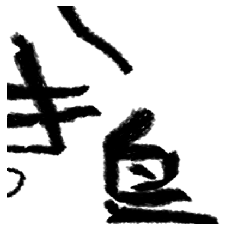

In [19]:
# 이미지 자르기
import matplotlib.pyplot as plt
import cv2

img = cv2.imread("test.png")

img2 = img[150:450, 150:450]  # 리스트 슬라이싱 기법을 사용해 [y1:y2,x1:x2] 형식으로 자른다.

img2 = cv2.resize(img2, (400,400))

cv2.imwrite("cut-resize.png", img2)

plt.axis("off")
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.show()

## 얼굴 검출 프로그램 만들기

In [41]:
# 모듈 불러오기
import matplotlib.pyplot as plt
import cv2

In [42]:
# 캐스케이드 파일 지정해서 검출기 생성
cascade_file = "haarcascade_frontalface_alt.xml"
cascade = cv2.CascadeClassifier(cascade_file)

In [43]:
# 이미지를 읽어 들이고, 그레이스케일로 변환
img = cv2.imread("girl.png")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

얼굴의 좌표 = 202 193 196 196


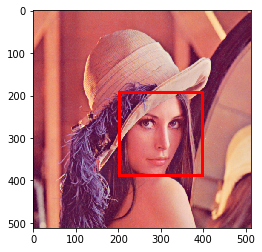

In [44]:
# 얼굴 인식
face_list = cascade.detectMultiScale(img_gray, minSize=(150,150))

# 결과 확인
if len(face_list) == 0:
    print('실패')
    quit()
    
# 인식한 부분 표시
for (x,y,w,h) in face_list:
    print('얼굴의 좌표 =', x,y,w,h)
    red = (0,0,255)
    cv2.rectangle(img, (x,y), (x+w, y+h), red, thickness=5)

# 이미지 출력
cv2.imwrite("face-detect.png", img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

### 손글씨 데이터 불러오기

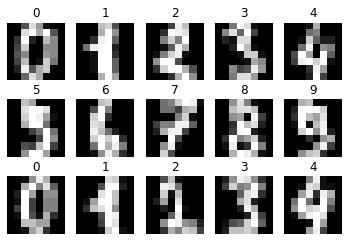

In [21]:
import matplotlib.pyplot as plt
from sklearn import datasets
digits = datasets.load_digits()

for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.axis("off")
    plt.title(str(digits.target[i]))
    plt.imshow(digits.images[i], cmap="gray")

plt.show()

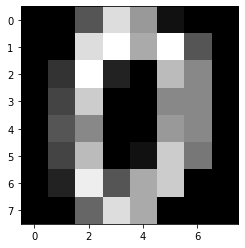

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [22]:
# 이미지 형식
d0 = digits.images[0]
plt.imshow(d0, cmap="gray")
plt.show()
print(d0)

## 숫자 판정 머신러닝

In [1]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, svm, metrics
from sklearn.metrics import accuracy_score

digits = datasets.load_digits()
x = digits.images
y = digits.target
x = x.reshape((-1,64))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

clf = svm.LinearSVC()
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.9472222222222222


/Users/HumanRevolution/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [2]:
# 학습한 데이터 저장하기
from sklearn.externals import joblib
joblib.dump(clf, 'digits.pkl')

/Users/HumanRevolution/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['digits.pkl']

In [4]:
# 학습한 데이터 읽어 들이기
clf = joblib.load("digits.pkl")

### 자신이 작성한 이미지 판별하기

In [6]:
import cv2
from sklearn.externals import joblib

def predict_digit(filename):
    clf = joblib.load("digits.pkl")
    my_img = cv2.imread(filename)
    # 이미지 데이터를 학습에 적합하게 변환하기
    my_img = cv2.cvtColor(my_img, cv2.COLOR_BGR2GRAY)
    my_img = cv2.resize(my_img, (8,8))
    my_img = 15 - my_img // 16  # 흑백 반전
    # 2차원 배열을 1차원 배열로 변환하기
    my_img = my_img.reshape((-1,64))
    # 데이터 예측하기
    res = clf.predict(my_img)
    return res[0]

In [9]:
n = predict_digit("my2.png")
print("my2.png =" + str(n))
n = predict_digit("my4.png")
print("my4.png =" + str(n))

my2.png =2
my4.png =4


In [1]:
import cv2
import matplotlib.pyplot as plt

# 이미지 읽어 들이고 크기 변경
img = cv2.imread("flower.jpg")
img = cv2.resize(img, (300,169))

# 색공간 변경
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (7,7), 0)
img2 = cv2.threshold(gray, 140, 240, cv2.THRESH_BINARY_INV)[1]

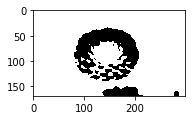

In [2]:
# 화면 왼쪽에 변환한 이미지 출력
plt.subplot(1,2,1)
plt.imshow(img2, cmap="gray")

In [4]:
# 윤곽 검출하기
cnts = cv2.findContours(img2, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[1]

# 검출한 윤곽 그리기
for pt in cnts:
    x, y, w, h = cv2.BoundingRect(pt)
    
    # 너무 크거나 작은 부분 제거
    if w < 30 or w > 200:
        continue
    print(x,y,w,h) # 결과 출력하기
    cv2.rectangle(img, (x,y), (x+w, y+h), (0,255,0), 2)
    
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.savefig("find_contours.png", dpi=200)
plt.show()

AttributeError: module 'cv2.cv2' has no attribute 'BoundingRect'